In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import seaborn as sns
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import dask.dataframe as dd
import warnings
from pylab import rcParams
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

# %matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%time
df = pd.read_excel("C:/Users/Khanh/Desktop/GMUeducation/AIT-724/TeamProject/version-FY22.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46299 entries, 0 to 46298
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Legal Business Name                                46299 non-null  object        
 1   Unique Entity ID                                   46299 non-null  object        
 2   Contracting Agency Name                            46299 non-null  object        
 3   Contracting Department Name                        46299 non-null  object        
 4   Contracting Office Name                            46299 non-null  object        
 5   PIID                                               46299 non-null  object        
 6   Period of Performance Start Date                   46299 non-null  datetime64[ns]
 7   Completion Date                                    46299 non-null  datetime64[ns]
 8   Vendor Address S

In [4]:
df.head(6)

Legal Business Name Unique Entity ID  \
0  ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.     C46VRCPM7ZQ5   
1                    NIGHT VISION DEVICES, INC.     RVKLEJAX7KK6   
2                             O.S 2 CORPORATION     NEV7LBSKTH95   
3                               MEM CORPORATION     L741A4BHXKH7   
4                                    GLEMCO LLC     EM4DKNDM3XG7   
5                     EXPOSERVE MANAGEMENT CORP     S6MWMDJHLWC3   

                     Contracting Agency Name Contracting Department Name  \
0  FEDERAL PRISON SYSTEM / BUREAU OF PRISONS      JUSTICE, DEPARTMENT OF   
1                           DEPT OF THE ARMY             DEPT OF DEFENSE   
2                           DEPT OF THE ARMY             DEPT OF DEFENSE   
3                           DEPT OF THE ARMY             DEPT OF DEFENSE   
4                           DEPT OF THE ARMY             DEPT OF DEFENSE   
5                           DEPT OF THE ARMY             DEPT OF DEFENSE   

       Contracting Office Name               PIID  \
0   NATIONAL ACQUISITIONS - CO  15BNAS21FW4T50001   
1        W4GG HQ US ARMY TACOM      W56HZV21FJ020   
2        W4GG HQ US ARMY TACOM      W56HZV21FJ023   
3        W4GG HQ US ARMY TACOM      W56HZV21FJ033   
4        W4GG HQ US ARMY TACOM      W56HZV21FJ040   
5  W7NV USPFO ACTIVITY OK ARNG      W912L621F2041   

  Period of Performance Start Date Completion Date Vendor Address State  \
0                       2020-10-01      2020-10-31             MARYLAND   
1                       2020-10-01      2020-10-31         PENNSYLVANIA   
2                       2020-10-01      2020-10-31              FLORIDA   
3                       2020-10-01      2020-10-31             MARYLAND   
4                       2020-10-01      2020-10-31       NORTH CAROLINA   
5                       2020-10-01      2020-10-31             OKLAHOMA   

  Vendor Address City  NAICS Code  \
0           ROCKVILLE      541930   
1           ALLENTOWN      334419   
2         DANIA BEACH      423860   
3        WHITE PLAINS      336992   
4         STATESVILLE      336411   
5               TULSA      722310   

                                   NAICS Description  \
0            TRANSLATION AND INTERPRETATION SERVICES   
1           OTHER ELECTRONIC COMPONENT MANUFACTURING   
2  TRANSPORTATION EQUIPMENT AND SUPPLIES (EXCEPT ...   
3  MILITARY ARMORED VEHICLE, TANK, AND TANK COMPO...   
4                             AIRCRAFT MANUFACTURING   
5                           FOOD SERVICE CONTRACTORS   

  Principal Place of Performance State Code  \
0                                        MD   
1                                        PA   
2                                        FL   
3                                        MD   
4                                        NC   
5                                        OK   

            Ultimate Parent Legal Business Name  \
0  ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.   
1               NIGHT VISION DEPOT INCORPORATED   
2                             O.S 2 CORPORATION   
3                               MEM CORPORATION   
4                                   GLEMCO LLC.   
5                     EXPOSERVE MANAGEMENT CORP   

  Ultimate Parent Unique Entity ID Award or IDV Type  \
0                     C46VRCPM7ZQ5          BPA CALL   
1                     RVKLEJAX7KK6          BPA CALL   
2                     NEV7LBSKTH95          BPA CALL   
3                     L741A4BHXKH7          BPA CALL   
4                     EM4DKNDM3XG7          BPA CALL   
5                     S6MWMDJHLWC3          BPA CALL   

   Base and All Options Value (Total Contract Value)  
0                                         2955549.20  
1                                          867377.00  
2                                          833930.19  
3                                          986890.52  
4                                          756462.57  
5                                          800000.00

In [5]:
# Create a reduced dataframe with only 4 columns and change the column names, and save to a CSV file
df_flag=pd.DataFrame()

df_flag['Business_Name'] =df['Ultimate Parent Legal Business Name']
df_flag['Vendor_State'] =df['Vendor Address State']
df_flag['Contracting_Agency'] = df['Contracting Agency Name']
df_flag['Contracting_Department'] =df['Contracting Department Name']
df_flag['Contract_Amount'] = df["Base and All Options Value (Total Contract Value)"]
df_flag['Business_ID'] =df['Ultimate Parent Unique Entity ID']

df_flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46299 entries, 0 to 46298
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Business_Name           46299 non-null  object 
 1   Vendor_State            46299 non-null  object 
 2   Contracting_Agency      46299 non-null  object 
 3   Contracting_Department  46299 non-null  object 
 4   Contract_Amount         46299 non-null  float64
 5   Business_ID             46299 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [6]:
df_flag.head(5)

Business_Name    Vendor_State  \
0  ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.        MARYLAND   
1               NIGHT VISION DEPOT INCORPORATED    PENNSYLVANIA   
2                             O.S 2 CORPORATION         FLORIDA   
3                               MEM CORPORATION        MARYLAND   
4                                   GLEMCO LLC.  NORTH CAROLINA   

                          Contracting_Agency  Contracting_Department  \
0  FEDERAL PRISON SYSTEM / BUREAU OF PRISONS  JUSTICE, DEPARTMENT OF   
1                           DEPT OF THE ARMY         DEPT OF DEFENSE   
2                           DEPT OF THE ARMY         DEPT OF DEFENSE   
3                           DEPT OF THE ARMY         DEPT OF DEFENSE   
4                           DEPT OF THE ARMY         DEPT OF DEFENSE   

   Contract_Amount   Business_ID  
0       2955549.20  C46VRCPM7ZQ5  
1        867377.00  RVKLEJAX7KK6  
2        833930.19  NEV7LBSKTH95  
3        986890.52  L741A4BHXKH7  
4        756462.57  EM4DKNDM3XG7

In [7]:
# Assign a Numeric Value to each Contracting_Agency name with LabelEncoder in SKlearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_flag['Agency_ID'] = le.fit_transform(df_flag['Contracting_Agency'])

df_flag.to_csv('Government_Contractors_FY22.csv')

In [8]:
df_flag.head(10)

Business_Name    Vendor_State  \
0  ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.        MARYLAND   
1               NIGHT VISION DEPOT INCORPORATED    PENNSYLVANIA   
2                             O.S 2 CORPORATION         FLORIDA   
3                               MEM CORPORATION        MARYLAND   
4                                   GLEMCO LLC.  NORTH CAROLINA   
5                     EXPOSERVE MANAGEMENT CORP        OKLAHOMA   
6           SIEMENS HEALTHCARE DIAGNOSTICS INC.   MASSACHUSETTS   
7                                 JONES  DEANNE       TENNESSEE   
8                 HERITAGE PARK HOME OWNERS INC        OKLAHOMA   
9                     GREEN COUNTRY CORRAL  LLC        OKLAHOMA   

                          Contracting_Agency           Contracting_Department  \
0  FEDERAL PRISON SYSTEM / BUREAU OF PRISONS           JUSTICE, DEPARTMENT OF   
1                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
2                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
3                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
4                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
5                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
6            VETERANS AFFAIRS, DEPARTMENT OF  VETERANS AFFAIRS, DEPARTMENT OF   
7                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
8                           DEPT OF THE ARMY                  DEPT OF DEFENSE   
9                           DEPT OF THE ARMY                  DEPT OF DEFENSE   

   Contract_Amount   Business_ID  Agency_ID  
0       2955549.20  C46VRCPM7ZQ5         65  
1        867377.00  RVKLEJAX7KK6         38  
2        833930.19  NEV7LBSKTH95         38  
3        986890.52  L741A4BHXKH7         38  
4        756462.57  EM4DKNDM3XG7         38  
5        800000.00  S6MWMDJHLWC3         38  
6       2143266.80  RDB2AM2GGHH8        148  
7        800000.00  G7LEZLCAEBM9         38  
8        800000.00  RJ2JRBNK62F3         38  
9        800000.00  XGNBCZ2KFGG1         38

In [9]:
# View how many Contracting_Departments and number of contracts that they have
state_Count = df_flag.groupby(['Vendor_State']).size().reset_index(name='Count').sort_values('Count', ascending=False)
state_Count.head(20)

Vendor_State  Count
50              VIRGINIA  10435
4             CALIFORNIA   4930
21              MARYLAND   3449
46                 TEXAS   2706
9                FLORIDA   1942
22         MASSACHUSETTS   1569
14              ILLINOIS   1273
33              NEW YORK   1195
40          PENNSYLVANIA   1132
37                  OHIO   1124
5               COLORADO   1055
10               GEORGIA    924
31            NEW JERSEY    854
8   DISTRICT OF COLUMBIA    835
0                ALABAMA    801
1                 ALASKA    758
34        NORTH CAROLINA    754
2                ARIZONA    738
26              MISSOURI    710
51            WASHINGTON    702

In [10]:
# Suppress the scientific notation (exponential) globally
pd.options.display.float_format = '{:.2f}'.format

# View total amount of contracts per state  #(['Contract_Amount']).sum()
state_Sum = df_flag.groupby('Vendor_State').apply(lambda x: (x['Contract_Amount']).sum())        
state_Sum



Vendor_State
ALABAMA                       15361123068.61
ALASKA                         4160880049.12
ARIZONA                       73837028437.22
ARKANSAS                        347275473.66
CALIFORNIA                    33107686440.13
COLORADO                      10270714626.97
CONNECTICUT                    5575288285.92
DELAWARE                        985368038.38
DISTRICT OF COLUMBIA          20534378539.72
FLORIDA                       16280366598.26
GEORGIA                        6198053099.90
GUAM                           1045225295.49
HAWAII                         1728961921.03
IDAHO                          1072339799.44
ILLINOIS                      15307855356.85
INDIANA                        7322439787.51
IOWA                           2292096269.54
KANSAS                         1806227134.58
KENTUCKY                       2571952745.23
LOUISIANA                      1500636088.54
MAINE                           508203348.23
MARYLAND                      28428930182.

In [13]:
df_pop = pd.read_csv("C:/Users/Khanh/Desktop/GMUeducation/AIT-724/TeamProject/State_Population.csv")
df_pop

Vendor_State  Population
0             CALIFORNIA    39029342
1                  TEXAS    30029572
2                FLORIDA    22244823
3               NEW YORK    19677151
4           PENNSYLVANIA    12972008
5               ILLINOIS    12582032
6                   OHIO    11756058
7                GEORGIA    10912876
8         NORTH CAROLINA    10698973
9               MICHIGAN    10034113
10            NEW JERSEY     9261699
11              VIRGINIA     8683619
12            WASHINGTON     7785786
13               ARIZONA     7359197
14             TENNESSEE     7051339
15         MASSACHUSETTS     6981974
16               INDIANA     6833037
17              MISSOURI     6177957
18              MARYLAND     6164660
19             WISCONSIN     5892539
20              COLORADO     5839926
21             MINNESOTA     5717184
22        SOUTH CAROLINA     5282634
23               ALABAMA     5074296
24             LOUISIANA     4590241
25              KENTUCKY     4512310
26                OREGON     4240137
27              OKLAHOMA     4019800
28           CONNECTICUT     3626205
29                  UTAH     3380800
30                  IOWA     3200517
31                NEVADA     3177772
32              ARKANSAS     3045637
33           MISSISSIPPI     2940057
34                KANSAS     2937150
35            NEW MEXICO     2113344
36              NEBRASKA     1967923
37                 IDAHO     1939033
38         WEST VIRGINIA     1775156
39                HAWAII     1440196
40         NEW HAMPSHIRE     1395231
41                 MAINE     1385340
42               MONTANA     1122867
43          RHODE ISLAND     1093734
44              DELAWARE     1018396
45          SOUTH DAKOTA      909824
46          NORTH DAKOTA      779261
47                ALASKA      733583
48  DISTRICT OF COLUMBIA      671803
49               VERMONT      647064
50               WYOMING      581381

In [14]:
state_Sum1 = pd.DataFrame(state_Sum)
state_merged = pd.merge(df_pop, state_Sum1, on="Vendor_State")
state_merged.columns = ["Vendor_State", "Population", "Contract_Amount"]
state_merged["Per_Capita"] = state_merged["Contract_Amount"] / state_merged["Population"]
state_merged

Vendor_State  Population  Contract_Amount  Per_Capita
0             CALIFORNIA    39029342   33107686440.13      848.28
1                  TEXAS    30029572   43513282687.93     1449.01
2                FLORIDA    22244823   16280366598.26      731.87
3               NEW YORK    19677151   34575097976.91     1757.12
4           PENNSYLVANIA    12972008   10779985627.62      831.02
5               ILLINOIS    12582032   15307855356.85     1216.64
6                   OHIO    11756058   10767015428.59      915.87
7                GEORGIA    10912876    6198053099.90      567.96
8         NORTH CAROLINA    10698973    3459619060.33      323.36
9               MICHIGAN    10034113    4601764315.35      458.61
10            NEW JERSEY     9261699   11952850557.61     1290.57
11              VIRGINIA     8683619  162959125966.63    18766.27
12            WASHINGTON     7785786    3755123053.36      482.30
13               ARIZONA     7359197   73837028437.22    10033.30
14             TENNESSEE     7051339    3405924924.53      483.02
15         MASSACHUSETTS     6981974   13893975604.07     1989.98
16               INDIANA     6833037    7322439787.51     1071.62
17              MISSOURI     6177957   12744265323.06     2062.86
18              MARYLAND     6164660   28428930182.53     4611.60
19             WISCONSIN     5892539    3596969996.18      610.43
20              COLORADO     5839926   10270714626.97     1758.71
21             MINNESOTA     5717184    2539882646.72      444.25
22        SOUTH CAROLINA     5282634    3733451277.93      706.74
23               ALABAMA     5074296   15361123068.61     3027.24
24             LOUISIANA     4590241    1500636088.54      326.92
25              KENTUCKY     4512310    2571952745.23      569.99
26                OREGON     4240137    1097075667.41      258.74
27              OKLAHOMA     4019800    6657008546.05     1656.05
28           CONNECTICUT     3626205    5575288285.92     1537.50
29                  UTAH     3380800   14249800917.86     4214.92
30                  IOWA     3200517    2292096269.54      716.16
31                NEVADA     3177772    1756500051.97      552.75
32              ARKANSAS     3045637     347275473.66      114.02
33           MISSISSIPPI     2940057    3469082611.69     1179.94
34                KANSAS     2937150    1806227134.58      614.96
35            NEW MEXICO     2113344    1165081806.73      551.30
36              NEBRASKA     1967923    2351164247.86     1194.74
37                 IDAHO     1939033    1072339799.44      553.03
38         WEST VIRGINIA     1775156     265839026.00      149.76
39                HAWAII     1440196    1728961921.03     1200.50
40         NEW HAMPSHIRE     1395231    1435025737.72     1028.52
41                 MAINE     1385340     508203348.23      366.84
42               MONTANA     1122867     860605978.00      766.44
43          RHODE ISLAND     1093734     466199660.57      426.25
44              DELAWARE     1018396     985368038.38      967.57
45          SOUTH DAKOTA      909824     272017089.82      298.98
46          NORTH DAKOTA      779261    1007008080.92     1292.26
47                ALASKA      733583    4160880049.12     5672.00
48  DISTRICT OF COLUMBIA      671803   20534378539.72    30566.07
49               VERMONT      647064     435464336.88      672.98
50               WYOMING      581381     217493002.88      374.10

<AxesSubplot:xlabel='Vendor_State'>

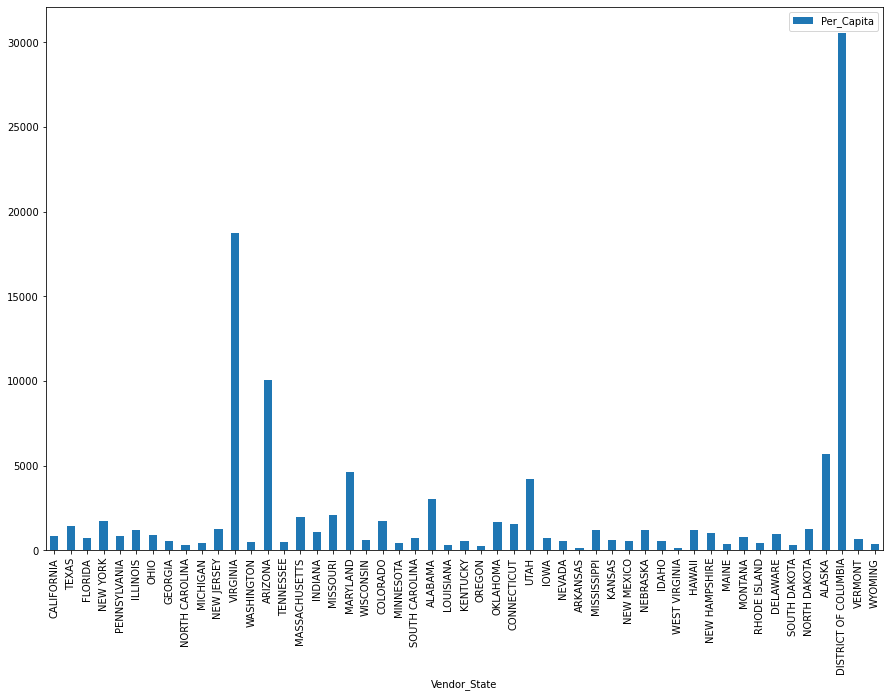

In [15]:
# plotting graph 
state_merged.plot(x="Vendor_State", y=["Per_Capita"], kind="bar", figsize=(15, 10)) 

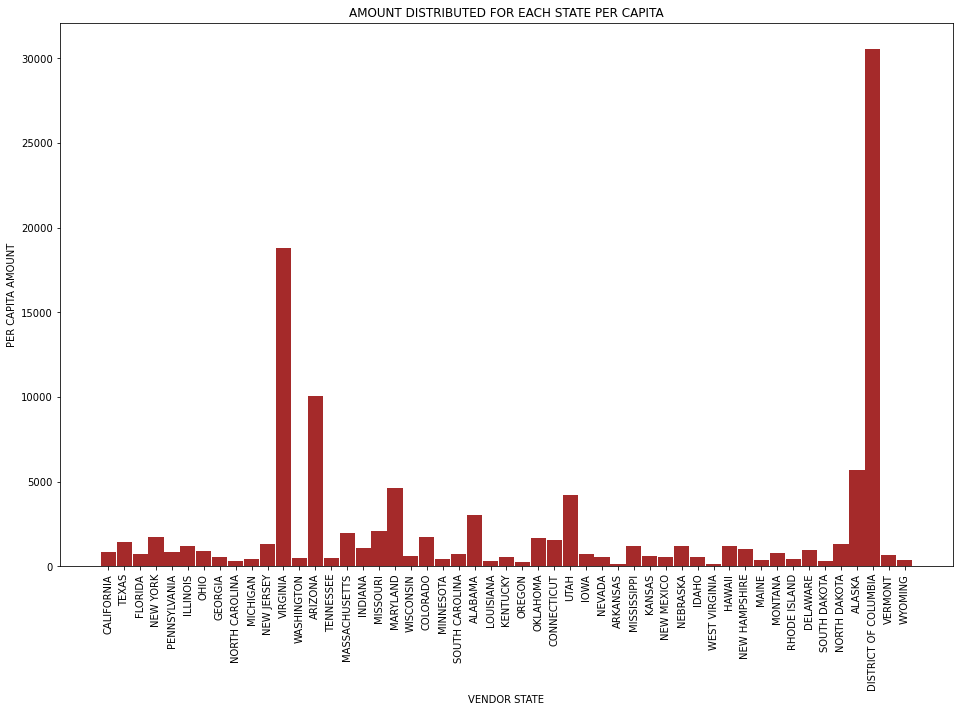

In [16]:
fig = plt.figure(figsize = (16, 10))
 
# creating the bar plot
plt.bar(state_merged["Vendor_State"], state_merged["Per_Capita"], color ='brown', width = 0.95)
 
plt.xlabel("VENDOR STATE")
plt.ylabel("PER CAPITA AMOUNT")
plt.xticks(rotation=90)
plt.title("AMOUNT DISTRIBUTED FOR EACH STATE PER CAPITA")

plt.show()

In [17]:
df_flag.head(20)

Business_Name    Vendor_State  \
0   ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.        MARYLAND   
1                NIGHT VISION DEPOT INCORPORATED    PENNSYLVANIA   
2                              O.S 2 CORPORATION         FLORIDA   
3                                MEM CORPORATION        MARYLAND   
4                                    GLEMCO LLC.  NORTH CAROLINA   
5                      EXPOSERVE MANAGEMENT CORP        OKLAHOMA   
6            SIEMENS HEALTHCARE DIAGNOSTICS INC.   MASSACHUSETTS   
7                                  JONES  DEANNE       TENNESSEE   
8                  HERITAGE PARK HOME OWNERS INC        OKLAHOMA   
9                      GREEN COUNTRY CORRAL  LLC        OKLAHOMA   
10                       SOULFUL CREATIONS  INC.        OKLAHOMA   
11                           OTB ACQUISITION LLC           TEXAS   
12                               GRIGGS  JEFFERY           TEXAS   
13                 HERITAGE PARK HOME OWNERS INC        OKLAHOMA   
14                     GREEN COUNTRY CORRAL  LLC        OKLAHOMA   
15                       SOULFUL CREATIONS  INC.        OKLAHOMA   
16                               GRIGGS  JEFFERY           TEXAS   
17                      FOCUSED MANAGEMENT  INC.        VIRGINIA   
18                      FOCUSED MANAGEMENT  INC.        VIRGINIA   
19  ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.        MARYLAND   

                           Contracting_Agency  \
0   FEDERAL PRISON SYSTEM / BUREAU OF PRISONS   
1                            DEPT OF THE ARMY   
2                            DEPT OF THE ARMY   
3                            DEPT OF THE ARMY   
4                            DEPT OF THE ARMY   
5                            DEPT OF THE ARMY   
6             VETERANS AFFAIRS, DEPARTMENT OF   
7                            DEPT OF THE ARMY   
8                            DEPT OF THE ARMY   
9                            DEPT OF THE ARMY   
10                           DEPT OF THE ARMY   
11                           DEPT OF THE ARMY   
12                           DEPT OF THE ARMY   
13                           DEPT OF THE ARMY   
14                           DEPT OF THE ARMY   
15                           DEPT OF THE ARMY   
16                           DEPT OF THE ARMY   
17          USDA, DEPARTMENTAL ADMINISTRATION   
18          USDA, DEPARTMENTAL ADMINISTRATION   
19  FEDERAL PRISON SYSTEM / BUREAU OF PRISONS   

             Contracting_Department  Contract_Amount   Business_ID  Agency_ID  
0            JUSTICE, DEPARTMENT OF       2955549.20  C46VRCPM7ZQ5         65  
1                   DEPT OF DEFENSE        867377.00  RVKLEJAX7KK6         38  
2                   DEPT OF DEFENSE        833930.19  NEV7LBSKTH95         38  
3                   DEPT OF DEFENSE        986890.52  L741A4BHXKH7         38  
4                   DEPT OF DEFENSE        756462.57  EM4DKNDM3XG7         38  
5                   DEPT OF DEFENSE        800000.00  S6MWMDJHLWC3         38  
6   VETERANS AFFAIRS, DEPARTMENT OF       2143266.80  RDB2AM2GGHH8        148  
7                   DEPT OF DEFENSE        800000.00  G7LEZLCAEBM9         38  
8                   DEPT OF DEFENSE        800000.00  RJ2JRBNK62F3         38  
9                   DEPT OF DEFENSE        800000.00  XGNBCZ2KFGG1         38  
10                  DEPT OF DEFENSE        800000.00  SRZYTKCTL2J7         38  
11                  DEPT OF DEFENSE        800000.00  R3U4MUHPA7N3         38  
12                  DEPT OF DEFENSE        800000.00  H87CE8NBK255         38  
13                  DEPT OF DEFENSE        800000.00  RJ2JRBNK62F3         38  
14                  DEPT OF DEFENSE        800000.00  XGNBCZ2KFGG1         38  
15                  DEPT OF DEFENSE        800000.00  SRZYTKCTL2J7         38  
16                  DEPT OF DEFENSE        800000.00  H87CE8NBK255         38  
17       AGRICULTURE, DEPARTMENT OF       3321140.78  VZSYU448MJJ8        146  
18       AGRICULTURE, DEPARTMENT OF       1309434.89  VZ

In [18]:
VA_MD = ['VIRGINIA', 'MARYLAND']
# filter rows based on list values
mask = df_flag['Vendor_State'].isin(VA_MD)
VA_MD_data = df_flag[mask]

VA_MD_data.to_csv('VA_MD_data.csv')

In [19]:
VA_MD_data.head(10)

Business_Name Vendor_State  \
0   ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.     MARYLAND   
3                                MEM CORPORATION     MARYLAND   
17                      FOCUSED MANAGEMENT  INC.     VIRGINIA   
18                      FOCUSED MANAGEMENT  INC.     VIRGINIA   
19  ADVANCED LANGUAGE SYSTEMS INTERNATIONAL INC.     MARYLAND   
20              GRANT THORNTON INTERNATIONAL LTD     VIRGINIA   
22       BOOZ ALLEN HAMILTON HOLDING CORPORATION     VIRGINIA   
35                      FOCUSED MANAGEMENT  INC.     VIRGINIA   
36                      FOCUSED MANAGEMENT  INC.     VIRGINIA   
37                      FOCUSED MANAGEMENT  INC.     VIRGINIA   

                               Contracting_Agency  \
0       FEDERAL PRISON SYSTEM / BUREAU OF PRISONS   
3                                DEPT OF THE ARMY   
17              USDA, DEPARTMENTAL ADMINISTRATION   
18              USDA, DEPARTMENTAL ADMINISTRATION   
19      FEDERAL PRISON SYSTEM / BUREAU OF PRISONS   
20                 US PATENT AND TRADEMARK OFFICE   
22  NATIONAL AERONAUTICS AND SPACE ADMINISTRATION   
35              USDA, DEPARTMENTAL ADMINISTRATION   
36              USDA, DEPARTMENTAL ADMINISTRATION   
37              USDA, DEPARTMENTAL ADMINISTRATION   

                           Contracting_Department  Contract_Amount  \
0                          JUSTICE, DEPARTMENT OF       2955549.20   
3                                 DEPT OF DEFENSE        986890.52   
17                     AGRICULTURE, DEPARTMENT OF       3321140.78   
18                     AGRICULTURE, DEPARTMENT OF       1309434.89   
19                         JUSTICE, DEPARTMENT OF       7200000.00   
20                        COMMERCE, DEPARTMENT OF       1614836.66   
22  NATIONAL AERONAUTICS AND SPACE ADMINISTRATION       1686651.00   
35                     AGRICULTURE, DEPARTMENT OF       1974573.40   
36                     AGRICULTURE, DEPARTMENT OF       5535234.63   
37                     AGRICULTURE, DEPARTMENT OF        777774.80   

     Business_ID  Agency_ID  
0   C46VRCPM7ZQ5         65  
3   L741A4BHXKH7         38  
17  VZSYU448MJJ8        146  
18  VZSYU448MJJ8        146  
19  C46VRCPM7ZQ5         65  
20  MNH8YKM7CK74        145  
22  MBPHTU7Y9S65         87  
35  VZSYU448MJJ8        146  
36  VZSYU448MJJ8        146  
37  VZSYU448MJJ8        146

In [20]:
# View total amount of contracts for Each state  #(['Contract_Amount']).sum()
state_Total = VA_MD_data.groupby('Vendor_State').apply(lambda x: (x['Contract_Amount']).sum())        
state_Total

Vendor_State
MARYLAND    28428930182.53
VIRGINIA   162959125966.63
dtype: float64

In [21]:
# View how many businesses and number of contracts awarded to them
company_Count = VA_MD_data.groupby(['Business_Name']).size().reset_index(name='Count').sort_values('Count', ascending=False)
company_Count

Business_Name  Count
317                     ATLANTIC DIVING SUPPLY  INC.    670
2271  SCIENCE APPLICATIONS INTERNATIONAL CORPORATION    232
437          BOOZ ALLEN HAMILTON HOLDING CORPORATION    227
1473                        JOHNS HOPKINS UNIVERSITY    213
1577                           LEIDOS HOLDINGS  INC.    211
...                                              ...    ...
1313                              INADEV CORPORATION      1
1312                              INA SOLUTIONS INC.      1
1307                                IMMIXGROUP  INC.      1
1302         IMAGINE ONE TECHNOLOGY & MANAGEMENT LTD      1
2853                                       ZOOM INC.      1

[2854 rows x 2 columns]

In [22]:
# View how many Contracting_Agency and number of contracts that they have
agency_Count = VA_MD_data.groupby(['Contracting_Agency']).size().reset_index(name='Count').sort_values('Count', ascending=False)
agency_Count

Contracting_Agency  Count
37                             DEPT OF THE NAVY   2264
36                             DEPT OF THE ARMY   1158
28                     DEFENSE LOGISTICS AGENCY   1104
35                        DEPT OF THE AIR FORCE    929
140             VETERANS AFFAIRS, DEPARTMENT OF    745
..                                          ...    ...
58   FEDERAL MEDIATION AND CONCILIATION SERVICE      1
55               FEDERAL HOUSING FINANCE AGENCY      1
114                    SELECTIVE SERVICE SYSTEM      1
77               INTERNATIONAL TRADE COMMISSION      1
56            FEDERAL LABOR RELATIONS AUTHORITY      1

[142 rows x 2 columns]

In [23]:
# View how many Contracting_Departments and number of contracts that they have
state_Count = VA_MD_data.groupby(['Vendor_State']).size().reset_index(name='Count').sort_values('Count', ascending=False)
state_Count.head(20)

Vendor_State  Count
1     VIRGINIA  10435
0     MARYLAND   3449

In [24]:
# Establish link between Business and Govt Agency
df_Agency = VA_MD_data[['Contracting_Agency', 'Business_Name', 'Contract_Amount']]
df_Agency['Agency_Link_Business'] = df_Agency[['Contracting_Agency', 'Business_Name']].apply("-".join, axis=1)
df_Agency.sort_values('Contract_Amount', ascending=False)

C:\Users\khanh\AppData\Local\Temp/ipykernel_14040/3873698410.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Contracting_Agency  \
623                 RURAL HOUSING SERVICE   
7895      FEDERAL AVIATION ADMINISTRATION   
4891          FEDERAL ACQUISITION SERVICE   
22029                    DEPT OF THE ARMY   
5242                     DEPT OF THE NAVY   
...                                   ...   
43297             MARITIME ADMINISTRATION   
38490                    DEPT OF THE ARMY   
6552                DEPT OF THE AIR FORCE   
6553                DEPT OF THE AIR FORCE   
46195  U.S. CUSTOMS AND BORDER PROTECTION   

                                        Business_Name  Contract_Amount  \
623                           BLAKE WILLSON GROUP LLC   24318786432.45   
7895                            LEIDOS HOLDINGS  INC.    6775153307.00   
4891                            LEIDOS HOLDINGS  INC.    4077566717.00   
22029  SCIENCE APPLICATIONS INTERNATIONAL CORPORATION    3570734171.01   
5242              HUNTINGTON INGALLS INDUSTRIES  INC.    2994237224.00   
...                                               ...              ...   
43297                GRANT THORNTON PUBLIC SECTOR LLC        750000.00   
38490                       EDMOND SCIENTIFIC COMPANY        750000.00   
6552                    INTELLIGENT FUSION TECHNOLOGY        750000.00   
6553                    INTELLIGENT FUSION TECHNOLOGY        750000.00   
46195                                CONTROP USA INC.        750000.00   

                                    Agency_Link_Business  
623        RURAL HOUSING SERVICE-BLAKE WILLSON GROUP LLC  
7895   FEDERAL AVIATION ADMINISTRATION-LEIDOS HOLDING...  
4891   FEDERAL ACQUISITION SERVICE-LEIDOS HOLDINGS  INC.  
22029  DEPT OF THE ARMY-SCIENCE APPLICATIONS INTERNAT...  
5242   DEPT OF THE NAVY-HUNTINGTON INGALLS INDUSTRIES...  
...                                                  ...  
43297  MARITIME ADMINISTRATION-GRANT THORNTON PUBLIC ...  
38490         DEPT OF THE ARMY-EDMOND SCIENTIFIC COMPANY  
6552   DEPT OF THE AIR FORCE-INTELLIGENT FUSION TECHN...  
6553   DEPT OF THE AIR FORCE-INTELLIGENT FUSION TECHN...  
46195  U.S. CUSTOMS AND BORDER PROTECTION-CONTROP USA...  

[13884 rows x 4 columns]

In [25]:
df_Agency1 = df_Agency.groupby(['Agency_Link_Business', 'Contract_Amount']).size()\
.reset_index(name='Number_of_Links').sort_values('Number_of_Links', ascending=False)
df_Agency1

Agency_Link_Business  Contract_Amount  \
2258   DEFENSE LOGISTICS AGENCY-UNITED CAPITAL INVEST...       1289925.90   
8989              INTERNAL REVENUE SERVICE-MAXIMUS  INC.      62422544.00   
8232   FEDERAL PRISON SYSTEM / BUREAU OF PRISONS-PGLS...       1400000.00   
2275   DEFENSE LOGISTICS AGENCY-UNITED CAPITAL INVEST...       6744723.00   
123    AGRICULTURAL MARKETING SERVICE-SUDANOS PRODUCE...       7450063.40   
...                                                  ...              ...   
4606             DEPT OF THE NAVY-AGBM-ATI JOINT VENTURE       4717990.03   
4607                DEPT OF THE NAVY-AGILE DEFENSE  INC.       1287458.37   
4608                   DEPT OF THE NAVY-AGILE-BOT II LLC      72996223.98   
4609                          DEPT OF THE NAVY-AGOVX LLC        911861.28   
13747  WASHINGTON HEADQUARTERS SERVICES (WHS)-UNIVERS...      10965612.00   

       Number_of_Links  
2258                10  
8989                 7  
8232                 7  
2275                 6  
123                  4  
...                ...  
4606                 1  
4607                 1  
4608                 1  
4609                 1  
13747                1  

[13748 rows x 3 columns]

In [26]:
Contract_link_Agency_df = VA_MD_data[['Contracting_Agency', 'Business_Name', ]]
Contract_link_Agency_df['Edges'] = df_Agency[['Contracting_Agency', 'Business_Name']].apply("|".join, axis=1)

Contract_link_Agency_df  = Contract_link_Agency_df.groupby(['Edges']).size().reset_index(name='Number_of_Edges').sort_values(
    'Number_of_Edges', ascending=False)
Contract_link_Agency_df[['node_1', 'node_2']] = Contract_link_Agency_df.Edges.str.split('|', expand=True)
Contract_link_Agency_df.drop(columns=['Edges'], inplace=True)
Contract_link_Agency_df.columns = ['Number_of_links', 'node_1', 'node_2']
Contract_link_Agency_df

C:\Users\khanh\AppData\Local\Temp/ipykernel_14040/2811819468.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number_of_links                                     node_1  \
669               629                   DEFENSE LOGISTICS AGENCY   
2156              141                           DEPT OF THE NAVY   
2329               85                           DEPT OF THE NAVY   
2182               68                           DEPT OF THE NAVY   
4213               67           OFFICE OF PROCUREMENT OPERATIONS   
...               ...                                        ...   
2884                1            FEDERAL AVIATION ADMINISTRATION   
595                 1  DEFENSE INFORMATION SYSTEMS AGENCY (DISA)   
594                 1  DEFENSE INFORMATION SYSTEMS AGENCY (DISA)   
2889                1            FEDERAL AVIATION ADMINISTRATION   
0                   1   ADMINISTRATION FOR CHILDREN AND FAMILIES   

                                                node_2  
669                       ATLANTIC DIVING SUPPLY  INC.  
2156                          JOHNS HOPKINS UNIVERSITY  
2329    SCIENCE APPLICATIONS INTERNATIONAL CORPORATION  
2182                             LEIDOS HOLDINGS  INC.  
4213  SECURITAS CRITICAL INFRASTRUCTURE SERVICES  INC.  
...                                                ...  
2884                           SUPREME SOLUTIONS  INC.  
595                           KINGFISHER SYSTEMS  INC.  
594                           JOHNS HOPKINS UNIVERSITY  
2889           V-PROJECT MANAGEMENT CONSULTING (V-PMC)  
0                                  ABT ASSOCIATES INC.  

[5791 rows x 3 columns]

In [27]:
%%time
# Fit the dataframe into a graph
G = nx.from_pandas_edgelist(Contract_link_Agency_df, 'node_1', 'node_2', edge_attr='Number_of_links')
G

Wall time: 41 ms


In [28]:
# View the edges
edgelist = nx.to_edgelist(G)
list(edgelist)[:15]

[('DEFENSE LOGISTICS AGENCY',
  'ATLANTIC DIVING SUPPLY  INC.',
  {'Number_of_links': 629}),
 ('DEFENSE LOGISTICS AGENCY',
  'FEDERAL RESOURCES SUPPLY COMPANY',
  {'Number_of_links': 65}),
 ('DEFENSE LOGISTICS AGENCY',
  'CARTRIDGE TECHNOLOGIES  INC.',
  {'Number_of_links': 48}),
 ('DEFENSE LOGISTICS AGENCY',
  'UNITED CAPITAL INVESTMENT GROUP  INC.',
  {'Number_of_links': 41}),
 ('DEFENSE LOGISTICS AGENCY',
  'NATIONAL INDUSTRIES FOR THE BLIND',
  {'Number_of_links': 23}),
 ('DEFENSE LOGISTICS AGENCY', 'KPMG L.L.P.', {'Number_of_links': 14}),
 ('DEFENSE LOGISTICS AGENCY', 'DIAMOND GEEKS  CORP.', {'Number_of_links': 12}),
 ('DEFENSE LOGISTICS AGENCY', 'AMYX  INC.', {'Number_of_links': 11}),
 ('DEFENSE LOGISTICS AGENCY',
  'NORTHROP GRUMMAN SYSTEMS CORPORATION',
  {'Number_of_links': 10}),
 ('DEFENSE LOGISTICS AGENCY',
  'ACCENTURE FEDERAL SERVICES LLC',
  {'Number_of_links': 10}),
 ('DEFENSE LOGISTICS AGENCY', 'CAPPS SHOE COMPANY', {'Number_of_links': 10}),
 ('DEFENSE LOGISTICS AGENCY'

In [29]:
# View each node degrees with Graph
degree = dict(nx.degree(G))
list(degree.items())[:20]

[('DEFENSE LOGISTICS AGENCY', 118),
 ('ATLANTIC DIVING SUPPLY  INC.', 12),
 ('DEPT OF THE NAVY', 629),
 ('JOHNS HOPKINS UNIVERSITY', 19),
 ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 27),
 ('LEIDOS HOLDINGS  INC.', 30),
 ('OFFICE OF PROCUREMENT OPERATIONS', 122),
 ('SECURITAS CRITICAL INFRASTRUCTURE SERVICES  INC.', 10),
 ('SERCO GROUP PLC', 10),
 ('FEDERAL RESOURCES SUPPLY COMPANY', 6),
 ('HUNTINGTON INGALLS INDUSTRIES  INC.', 1),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 232),
 ('FOUR POINTS TECHNOLOGY  L.L.C.', 27),
 ('FEDERAL AVIATION ADMINISTRATION', 72),
 ('MINBURN TECHNOLOGY GROUP', 9),
 ('CARTRIDGE TECHNOLOGIES  INC.', 4),
 ('TRIPLE CANOPY  INC.', 1),
 ('UNITED CAPITAL INVESTMENT GROUP  INC.', 1),
 ('PERSPECTA INC.', 15),
 ('INTERNAL REVENUE SERVICE', 124)]

In [30]:
degreeDict = dict(degree)
avgDegree = sum(degreeDict.values()) / len(degreeDict) 
avgDegree

3.8658210947930574

In [31]:
%%time
closeness = nx.closeness_centrality(G)

Wall time: 20 s


In [32]:
list(closeness.items())[:20]
#closeness

[('DEFENSE LOGISTICS AGENCY', 0.33924404446475837),
 ('ATLANTIC DIVING SUPPLY  INC.', 0.35018868456656604),
 ('DEPT OF THE NAVY', 0.39075904532601247),
 ('JOHNS HOPKINS UNIVERSITY', 0.3538416722671182),
 ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 0.39255764692864403),
 ('LEIDOS HOLDINGS  INC.', 0.3768949933390668),
 ('OFFICE OF PROCUREMENT OPERATIONS', 0.3397073343855023),
 ('SECURITAS CRITICAL INFRASTRUCTURE SERVICES  INC.', 0.28012465721146856),
 ('SERCO GROUP PLC', 0.33181506750171286),
 ('FEDERAL RESOURCES SUPPLY COMPANY', 0.2935688775811771),
 ('HUNTINGTON INGALLS INDUSTRIES  INC.', 0.2808626596956538),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 0.3502297720574222),
 ('FOUR POINTS TECHNOLOGY  L.L.C.', 0.36225829456861763),
 ('FEDERAL AVIATION ADMINISTRATION', 0.32958025253896533),
 ('MINBURN TECHNOLOGY GROUP', 0.2741054497011395),
 ('CARTRIDGE TECHNOLOGIES  INC.', 0.2574614755257382),
 ('TRIPLE CANOPY  INC.', 0.25348236644407346),
 ('UNITED CAPITAL INVESTMENT GROUP  INC.', 0.253

In [33]:
#Calculate the Average of closeness
closenessDict = dict(closeness)
avgCloseness = sum(closenessDict.values()) / len(closenessDict) 
avgCloseness

0.2671547017989744

# CALCULATE BETWEENESS

In [32]:
%%time
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False) 

Wall time: 1min 17s


In [33]:
list(bet_centrality.items())[:10] 

[('DEFENSE LOGISTICS AGENCY', 0.04222618759315556),
 ('ATLANTIC DIVING SUPPLY  INC.', 0.00504467273220492),
 ('DEPT OF THE NAVY', 0.27996785917801464),
 ('JOHNS HOPKINS UNIVERSITY', 0.009076113506248734),
 ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 0.019304730026983397),
 ('LEIDOS HOLDINGS  INC.', 0.019968505165101416),
 ('OFFICE OF PROCUREMENT OPERATIONS', 0.03949295044300528),
 ('SECURITAS CRITICAL INFRASTRUCTURE SERVICES  INC.', 0.001292187865142124),
 ('SERCO GROUP PLC', 0.0031255672195760215),
 ('FEDERAL RESOURCES SUPPLY COMPANY', 0.0009843581867507373)]

In [34]:
#The average of Betweeness
betweenDict = dict(bet_centrality)
averageBtwn = sum(betweenDict.values()) / len(betweenDict) 
averageBtwn

0.0009207431120609852

In [35]:
# Calculate PAGERANK

In [34]:
%%time
pageRank = nx.pagerank(G, alpha = 0.8) 

Wall time: 41 ms


In [35]:
list(pageRank.items())[:10] 

[('DEFENSE LOGISTICS AGENCY', 0.00951975319295615),
 ('ATLANTIC DIVING SUPPLY  INC.', 0.0007863892063191937),
 ('DEPT OF THE NAVY', 0.05653674214675225),
 ('JOHNS HOPKINS UNIVERSITY', 0.001202822883500098),
 ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 0.0016384619168004183),
 ('LEIDOS HOLDINGS  INC.', 0.0018380961935163492),
 ('OFFICE OF PROCUREMENT OPERATIONS', 0.008887839269897077),
 ('SECURITAS CRITICAL INFRASTRUCTURE SERVICES  INC.', 0.0006277336968290644),
 ('SERCO GROUP PLC', 0.0006615524450796267),
 ('FEDERAL RESOURCES SUPPLY COMPANY', 0.000424323153377244)]

In [36]:
prDict = dict(pageRank)
averagePR = sum(prDict.values()) / len(prDict) 
averagePR

0.0003337783711615373

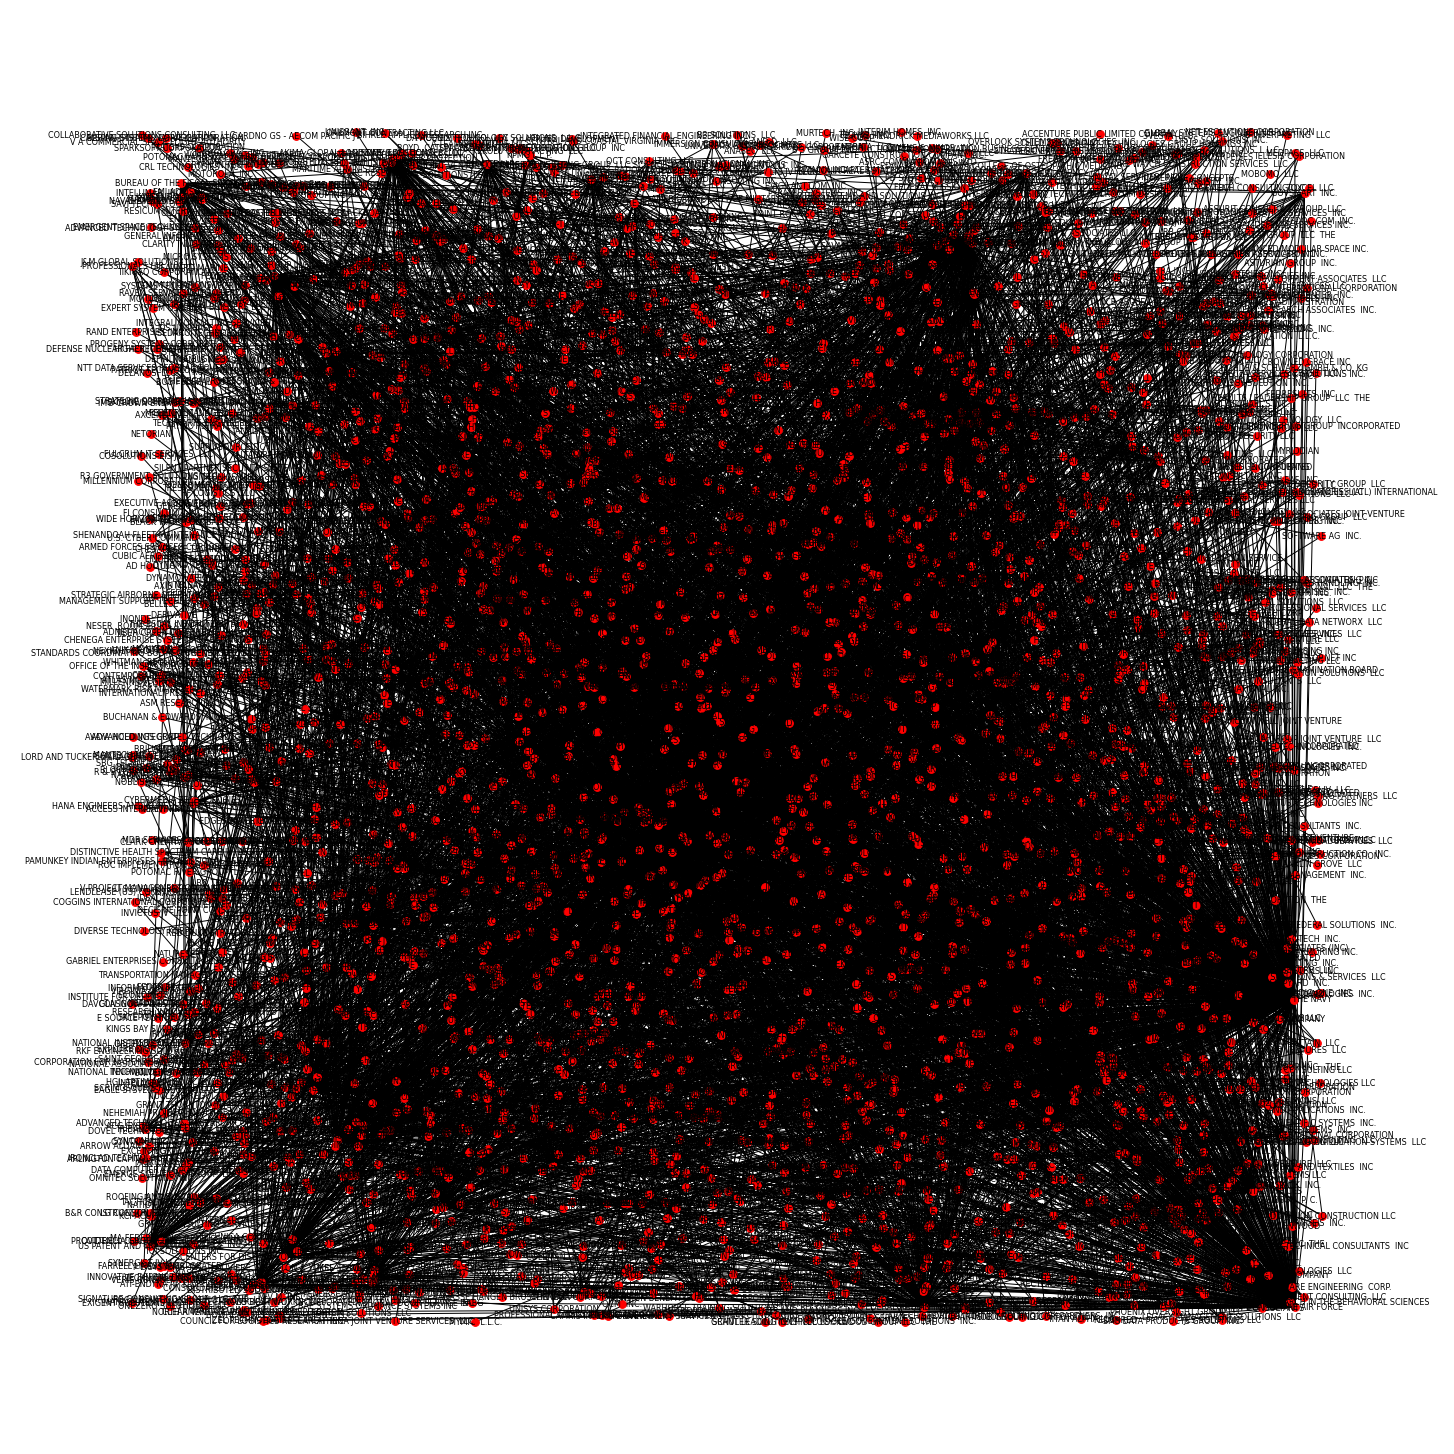

Wall time: 24.3 s


In [39]:
%%time
plt.figure(1, figsize=(20,20))
nx.draw_random(G, node_size=60, node_color='red', font_size=8, with_labels=True)
plt.show()

In [40]:
# eigenvector

Wall time: 174 ms


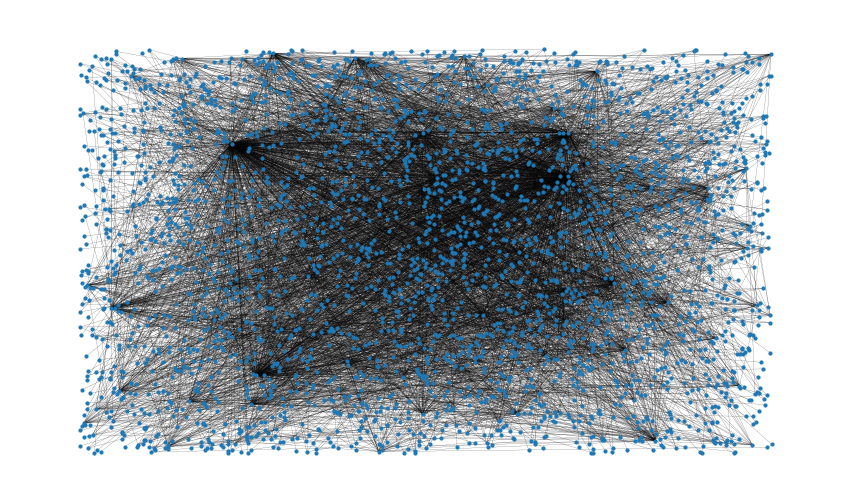

In [37]:
%%time
#Visualizing the graph
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Wall time: 17.8 s


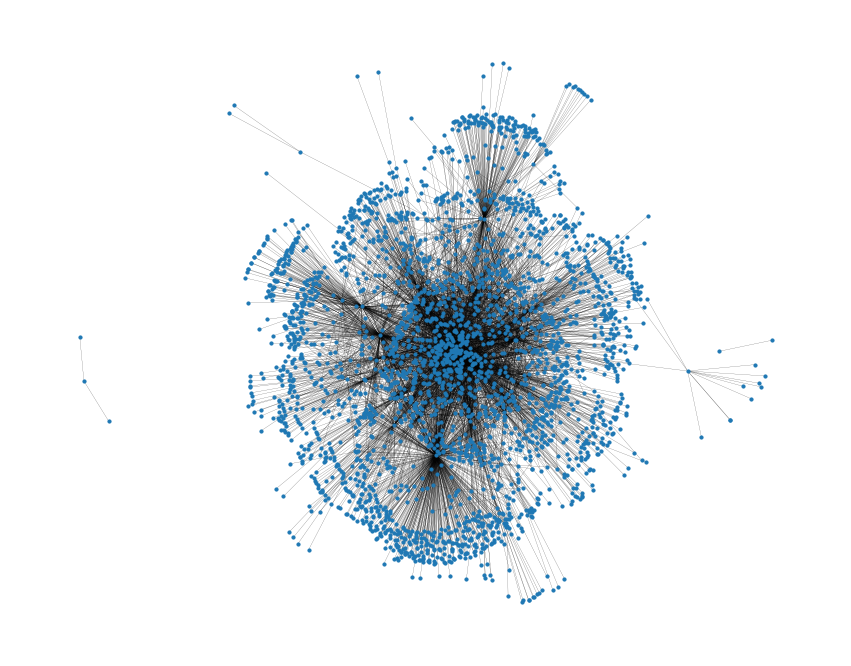

In [38]:
%%time
# Using spring_layout function to reduce the time
pos = nx.spring_layout(G, iterations=15, seed=2020)
fig, ax = plt.subplots(figsize=(15, 12))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [43]:
# View the edges
edgelist = nx.to_edgelist(G)
list(sorted(edgelist, key=lambda item: item[1], reverse=True))[:15]

[('USDA, DEPARTMENTAL ADMINISTRATION', 'ZOOM INC.', {'Number_of_links': 1}),
 ('OFFICE OF THE ASSISTANT SECRETARY FOR ADMINISTRATION (ASA)',
  'ZOLON PCS  LLC',
  {'Number_of_links': 1}),
 ('U.S. COAST GUARD', 'ZODIAC OF NORTH AMERICA  INC.', {'Number_of_links': 1}),
 ('FOOD AND DRUG ADMINISTRATION',
  'ZOCCHI AMERICA  INC.',
  {'Number_of_links': 2}),
 ('DEPT OF THE NAVY', 'ZNERGIS LLC', {'Number_of_links': 1}),
 ('STATE, DEPARTMENT OF', 'ZNERGIS LLC', {'Number_of_links': 2}),
 ('NATIONAL OCEANIC AND ATMOSPHERIC ADMINISTRATION',
  'ZNERGIS LLC',
  {'Number_of_links': 2}),
 ('FEDERAL EMERGENCY MANAGEMENT AGENCY',
  'ZNERGIS LLC',
  {'Number_of_links': 2}),
 ('USDA, DEPARTMENTAL ADMINISTRATION', 'ZNERGIS LLC', {'Number_of_links': 1}),
 ('EDUCATION, DEPARTMENT OF',
  'ZIP ZAP IT SOLUTIONS LLC',
  {'Number_of_links': 1}),
 ('VETERANS AFFAIRS, DEPARTMENT OF',
  'ZEVA INCORPROATED',
  {'Number_of_links': 1}),
 ('INTERNAL REVENUE SERVICE', 'ZEVA INCORPROATED', {'Number_of_links': 2}),
 ('U.S

# Basic topological attributes

In [44]:
#Total number of nodes in network:
G.number_of_nodes()

2996

In [45]:
#Total number of edges:
G.number_of_edges()

5791

In [46]:
#the average degree of a node can be seen
np.mean([d for _, d in G.degree()])

3.8658210947930574

## Page Rank

In [39]:
%%time
pageRank = nx.pagerank(G) 

Wall time: 49.8 ms


In [40]:
# Show top 10 page rank nodes
list(sorted(pageRank.items(), key=lambda item: item[1], reverse=True))[:10] 

[('DEPT OF THE NAVY', 0.05699133194397306),
 ('DEPT OF THE ARMY', 0.04995177861751102),
 ('DEPT OF THE AIR FORCE', 0.02899941745308381),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 0.021271023962986912),
 ('NATIONAL INSTITUTES OF HEALTH', 0.014047549930270393),
 ('FEDERAL ACQUISITION SERVICE', 0.010865443227567566),
 ('DEFENSE LOGISTICS AGENCY', 0.009737792664560749),
 ('INTERNAL REVENUE SERVICE', 0.009227244601286903),
 ('OFFICE OF PROCUREMENT OPERATIONS', 0.009204328991712328),
 ('DEFENSE INFORMATION SYSTEMS AGENCY (DISA)', 0.008907682516079634)]

In [41]:
# Average page
prDict = dict(pageRank)
averagePR = sum(prDict.values()) / len(prDict) 
averagePR

0.00033377837116155756

Wall time: 199 ms


(-1.194789699912071,
 1.0499303859472273,
 -0.7417021164298058,
 0.8503871926665306)

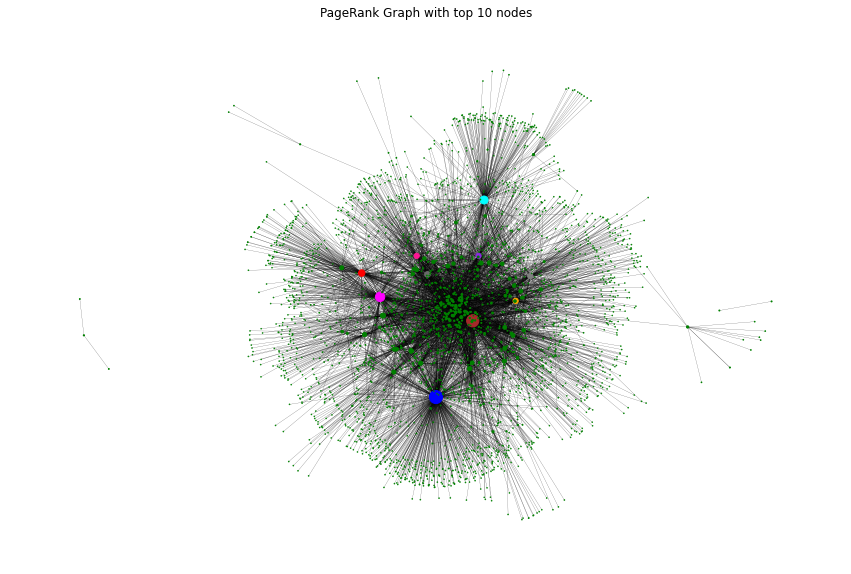

In [86]:
%%time
#check the users with highest pageRank from the size of their nodes:
node_size = [
    v * 3000 for v in pageRank.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 10))
color_map = []
for node in G:
    if node == 'DEPT OF THE NAVY':
        color_map.append('blue')
    elif node == 'DEPT OF THE ARMY':
        color_map.append('brown')
    elif node == 'DEPT OF THE AIR FORCE':
        color_map.append('magenta')
    elif node == 'VETERANS AFFAIRS, DEPARTMENT OF':
        color_map.append('cyan')
    elif node == 'NATIONAL INSTITUTES OF HEALTH':
        color_map.append('red')
    elif node == 'FEDERAL ACQUISITION SERVICE':
        color_map.append('dimgray')
    elif node == 'DEFENSE LOGISTICS AGENCY':
        color_map.append('gray')
    elif node == 'INTERNAL REVENUE SERVICE':
        color_map.append('deeppink')
    elif node == 'OFFICE OF PROCUREMENT OPERATIONS':
        color_map.append('orange')
    elif node == 'DEFENSE INFORMATION SYSTEMS AGENCY (DISA)':
        color_map.append('blueviolet')
    else: 
        color_map.append('green') 
# color_map = ['#C6442A' if node == 'DEPT OF THE NAVY' elif node == 'DEPT OF THE ARMY' else 'blue' for node in G] 
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color =color_map, with_labels=False, width=0.15)
plt.title("PageRank Graph with top 10 nodes")
plt.axis("off")

In [47]:
%%time
# The graph’s DENSITY 

nx.density(G)

Wall time: 2 ms


0.0012907582954233914

In [48]:
%%time
# The graph’s number of components
nx.number_connected_components(G)

Wall time: 7 ms


3

# Degree Centrality measures
Degree centrality assigns an importance score based simply on the number of links held by each node. In this analysis, the higher the degree centrality of a node is, the more edges are connected to the particular node and thus the more neighbor nodes this node has. In fact, the degree of centrality of a node is the fraction of nodes it is connected to. In other words, it is the percentage of the network that the particular node is connected to

In [49]:
%%time
# Degree Centrality
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

Wall time: 7 ms


[('DEPT OF THE NAVY', 0.21001669449081803),
 ('DEPT OF THE ARMY', 0.19265442404006677),
 ('DEPT OF THE AIR FORCE', 0.11953255425709516),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 0.07746243739565943),
 ('NATIONAL INSTITUTES OF HEALTH', 0.057429048414023375),
 ('FEDERAL ACQUISITION SERVICE', 0.04974958263772955),
 ('INTERNAL REVENUE SERVICE', 0.041402337228714524),
 ('OFFICE OF PROCUREMENT OPERATIONS', 0.04073455759599332)]

In [50]:
%%time
#see the number of neighbors for the nodes with the highest degree centralities:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

Wall time: 3 ms


[('DEPT OF THE NAVY', 629),
 ('DEPT OF THE ARMY', 577),
 ('DEPT OF THE AIR FORCE', 358),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 232),
 ('NATIONAL INSTITUTES OF HEALTH', 172),
 ('FEDERAL ACQUISITION SERVICE', 149),
 ('INTERNAL REVENUE SERVICE', 124),
 ('OFFICE OF PROCUREMENT OPERATIONS', 122),
 ('DEFENSE INFORMATION SYSTEMS AGENCY (DISA)', 122),
 ('DEFENSE LOGISTICS AGENCY', 118)]

#### View the top 10 nodes. Node 'DEPT OF THE NAVY'  has "629" edges

Wall time: 96 ms


Text(0, 0.5, 'Counts')

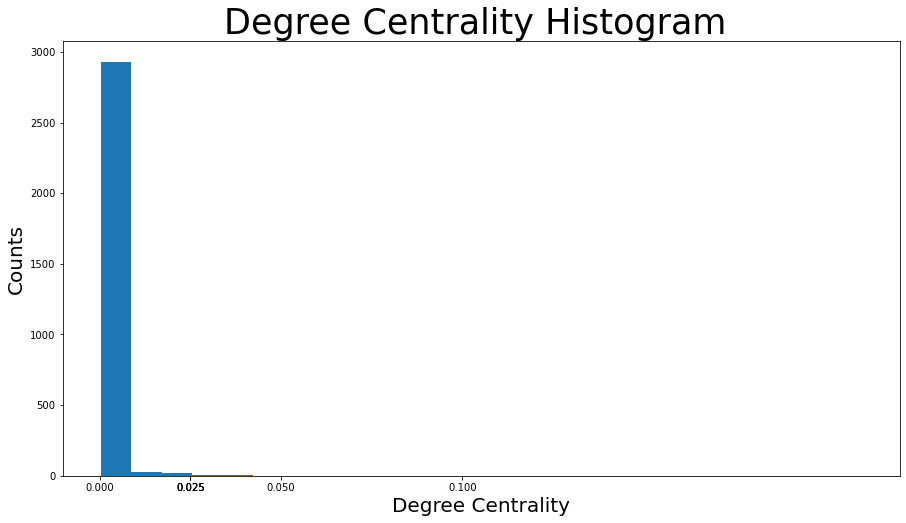

In [51]:
%%time
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.025, 0.025, 0.05, 0.1])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Wall time: 188 ms


(-1.194789699912071,
 1.0499303859472273,
 -0.7417021164298058,
 0.8503871926665306)

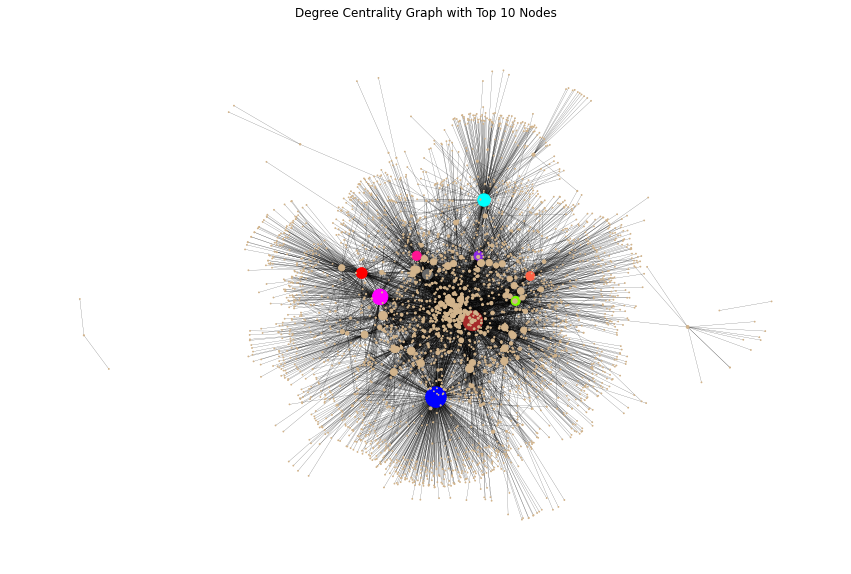

In [101]:
%%time
#check the users with highest degree centralities from the size of their nodes:
node_size = [
    v * 2000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 10))
color_map = []
for node in G:
    if node == 'DEPT OF THE NAVY':
        color_map.append('blue')
    elif node == 'DEPT OF THE ARMY':
        color_map.append('brown')
    elif node == 'DEPT OF THE AIR FORCE':
        color_map.append('magenta')
    elif node == 'VETERANS AFFAIRS, DEPARTMENT OF':
        color_map.append('cyan')
    elif node == 'NATIONAL INSTITUTES OF HEALTH':
        color_map.append('red')
    elif node == 'FEDERAL ACQUISITION SERVICE':
        color_map.append('dimgray')
    elif node == 'DEFENSE LOGISTICS AGENCY':
        color_map.append('tomato')
    elif node == 'INTERNAL REVENUE SERVICE':
        color_map.append('deeppink')
    elif node == 'OFFICE OF PROCUREMENT OPERATIONS':
        color_map.append('lawngreen')
    elif node == 'DEFENSE INFORMATION SYSTEMS AGENCY (DISA)':
        color_map.append('blueviolet')
    else: 
        color_map.append('tan') 
# color_map = ['#C6442A' if node == 'DEPT OF THE NAVY' elif node == 'DEPT OF THE ARMY' else 'blue' for node in G] 
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color =color_map, with_labels=False, width=0.15)
plt.title("Degree Centrality Graph with Top 10 Nodes")
plt.axis("off")

# Betweenness Centrality
##Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.

In [95]:
%%time
#10 highest betweenness centralities
betweenness_centrality = nx.centrality.betweenness_centrality(G)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

Wall time: 1min 19s


[('DEPT OF THE NAVY', 0.27996785917801464),
 ('DEPT OF THE ARMY', 0.2540004797570548),
 ('DEPT OF THE AIR FORCE', 0.13482160350125483),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 0.10229304676826913),
 ('NATIONAL INSTITUTES OF HEALTH', 0.06833495112639804),
 ('DEFENSE LOGISTICS AGENCY', 0.04222618759315556),
 ('FEDERAL ACQUISITION SERVICE', 0.04174488987163186),
 ('CARAHSOFT TECHNOLOGY CORPORATION', 0.04148690257245868),
 ('INTERNAL REVENUE SERVICE', 0.0410844220560962),
 ('DELOITTE LLP', 0.03958082792252179)]

Wall time: 187 ms


Text(0, 0.5, 'Counts')

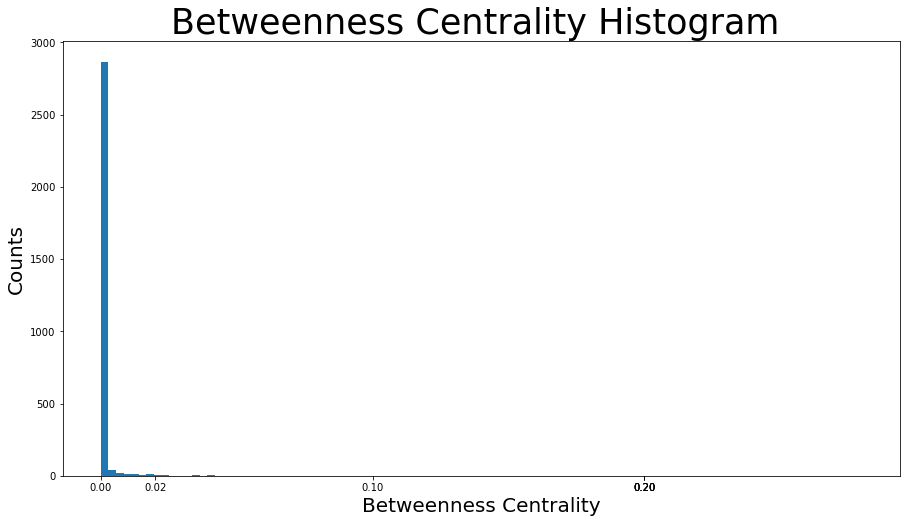

In [96]:
%%time
# the distribution of betweenness centralities histogram plot

plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.2, 0.2, 0.2])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Wall time: 175 ms


(-1.194789699912071,
 1.0499303859472273,
 -0.7417021164298058,
 0.8503871926665306)

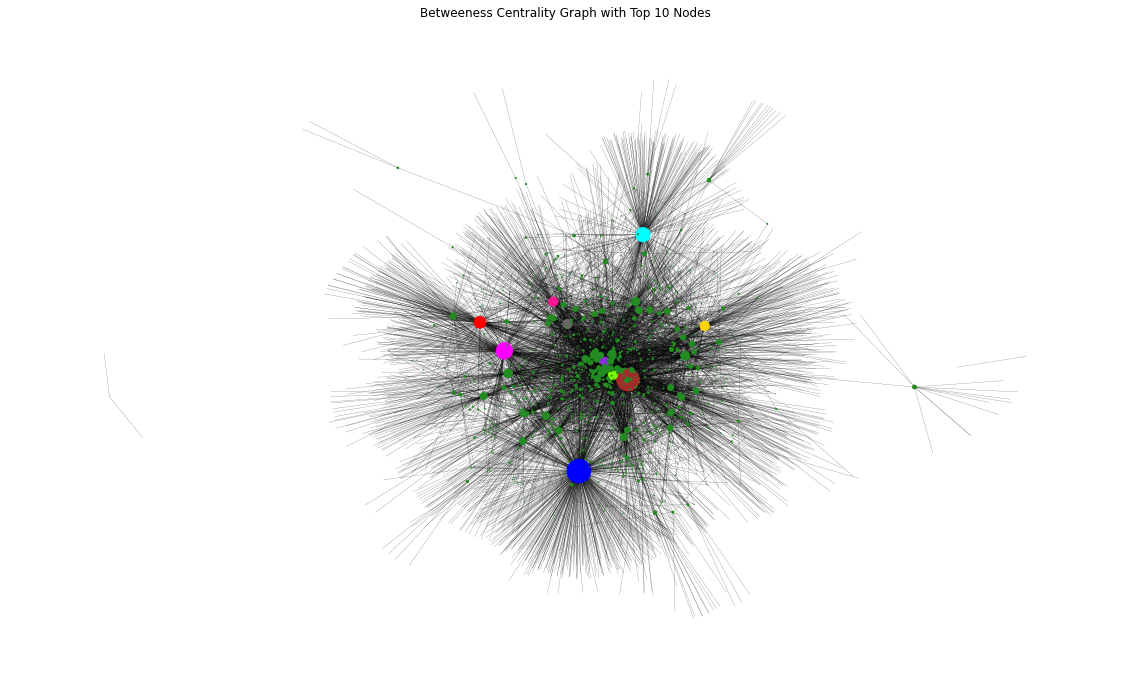

In [97]:
%%time
 # set up nodes size for a nice graph representation
node_size = [v * 2000 for v in betweenness_centrality.values()] 
plt.figure(figsize=(20, 12))
color_map = []
for node in G:
    if node == 'DEPT OF THE NAVY':
        color_map.append('blue')
    elif node == 'DEPT OF THE ARMY':
        color_map.append('brown')
    elif node == 'DEPT OF THE AIR FORCE':
        color_map.append('magenta')
    elif node == 'VETERANS AFFAIRS, DEPARTMENT OF':
        color_map.append('cyan')
    elif node == 'NATIONAL INSTITUTES OF HEALTH':
        color_map.append('red')
    elif node == 'FEDERAL ACQUISITION SERVICE':
        color_map.append('dimgray')
    elif node == 'DEFENSE LOGISTICS AGENCY':
        color_map.append('gold')
    elif node == 'INTERNAL REVENUE SERVICE':
        color_map.append('deeppink')
    elif node == 'CARAHSOFT TECHNOLOGY CORPORATION':
        color_map.append('lawngreen')
    elif node == 'DELOITTE LLP':
        color_map.append('blueviolet')
    else: 
        color_map.append('forestgreen') 

nx.draw_networkx(G, pos=pos, node_size=node_size, node_color =color_map, with_labels=False, width=0.15)
plt.title("Betweeness Centrality Graph with Top 10 Nodes")
plt.axis("off")

# Closeness Centrality

** Notes: Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network. For a node v, its closeness centrality measures the average farness to all other nodes. In other words, the higher the closeness centrality of v, the closer it is located to the center of the network.
The closeness centrality measure is very important for the monitoring of the spread of information. If the Node with the highest closeness centrality make some action or change, the whole network would get impacted the quickest possible. That is because the information would have to firstly reach a Node with high closeness centrality that would spread it to many different parts of the network.

In [102]:
%%time
closeness_centrality = nx.centrality.closeness_centrality(G)  # save results in a variable to use again
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

Wall time: 20.6 s


[('CARAHSOFT TECHNOLOGY CORPORATION', 0.42352558842869026),
 ('DELOITTE LLP', 0.42340543932558994),
 ('THUNDERCAT TECHNOLOGY  LLC', 0.42125435326635746),
 ('BOOZ ALLEN HAMILTON HOLDING CORPORATION', 0.40946616560293675),
 ('GENERAL DYNAMICS CORPORATION', 0.401967189233155),
 ('DELOITTE CONSULTING LLP', 0.40164267320309593),
 ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 0.39255764692864403),
 ('DEPT OF THE NAVY', 0.39075904532601247),
 ('ACCENTURE FEDERAL SERVICES LLC', 0.39040130097376524),
 ('DEPT OF THE ARMY', 0.38570982649507807)]

In [103]:
#the average distance of a particular node  to any other node
1 / closeness_centrality['DEPT OF THE NAVY']

2.559121821903558

Text(0, 0.5, 'Counts')

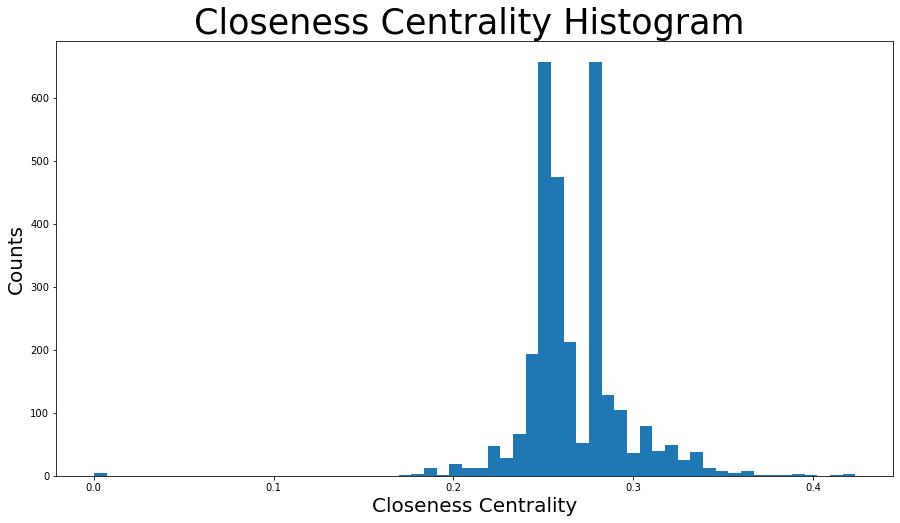

In [104]:
# the distribution of the closeness centralities:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Wall time: 423 ms


(-1.194789699912071,
 1.0499303859472273,
 -0.7417021164298058,
 0.8503871926665306)

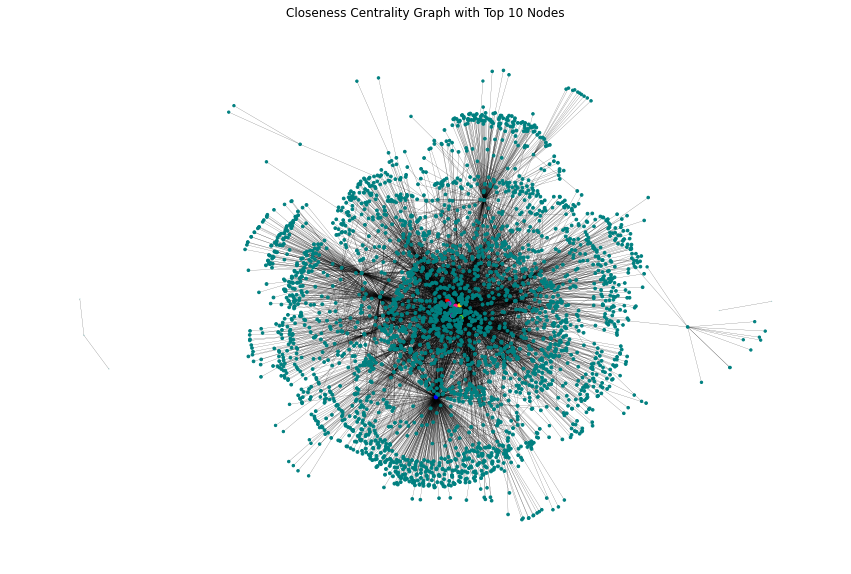

In [125]:
%%time
# [('CARAHSOFT TECHNOLOGY CORPORATION', 0.42352558842869026),
#  ('DELOITTE LLP', 0.42340543932558994),
#  ('THUNDERCAT TECHNOLOGY  LLC', 0.42125435326635746),
#  ('BOOZ ALLEN HAMILTON HOLDING CORPORATION', 0.40946616560293675),
#  ('GENERAL DYNAMICS CORPORATION', 0.401967189233155),
#  ('DELOITTE CONSULTING LLP', 0.40164267320309593),
#  ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 0.39255764692864403),
#  ('DEPT OF THE NAVY', 0.39075904532601247),
#  ('ACCENTURE FEDERAL SERVICES LLC', 0.39040130097376524),
#  ('DEPT OF THE ARMY', 0.38570982649507807)]
node_size = [v * 30 for v in closeness_centrality.values()]  
plt.figure(figsize=(15, 10))
color_map = []
for node in G:
    if node == 'DEPT OF THE NAVY':
        color_map.append('blue')
    elif node == 'DEPT OF THE ARMY':
        color_map.append('brown')
    elif node == 'SCIENCE APPLICATIONS INTERNATIONAL CORPORATION':
        color_map.append('magenta')
    elif node == 'THUNDERCAT TECHNOLOGY  LLC':
        color_map.append('cyan')
    elif node == 'BOOZ ALLEN HAMILTON HOLDING CORPORATION':
        color_map.append('red')
    elif node == 'GENERAL DYNAMICS CORPORATION':
        color_map.append('dimgray')
    elif node == 'ACCENTURE FEDERAL SERVICES LLC':
        color_map.append('gold')
    elif node == 'DELOITTE LLP':
        color_map.append('deeppink')
    elif node == 'CARAHSOFT TECHNOLOGY CORPORATION':
        color_map.append('lawngreen')
    elif node == 'DELOITTE CONSULTING LLP':
        color_map.append('blueviolet')
    else: 
        color_map.append('teal') 

nx.draw_networkx(G, pos=pos, node_size=node_size, node_color =color_map, with_labels=False, width=0.15)
plt.title("Closeness Centrality Graph with Top 10 Nodes")
plt.axis("off")

In [63]:
# Calculate PAGERANK

In [64]:
%%time
pageRank = nx.pagerank(G, alpha = 0.8) 

Wall time: 43 ms


In [65]:
list(sorted(pageRank.items(), key=lambda item: item[1], reverse=True))[:10] 

[('DEPT OF THE NAVY', 0.05653674214675225),
 ('DEPT OF THE ARMY', 0.04920952475363901),
 ('DEPT OF THE AIR FORCE', 0.02823848459018661),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 0.021168093334531648),
 ('NATIONAL INSTITUTES OF HEALTH', 0.013766612272632815),
 ('FEDERAL ACQUISITION SERVICE', 0.010354908042764732),
 ('DEFENSE LOGISTICS AGENCY', 0.00951975319295615),
 ('OFFICE OF PROCUREMENT OPERATIONS', 0.008887839269897077),
 ('INTERNAL REVENUE SERVICE', 0.008877101831399876),
 ('DEFENSE INFORMATION SYSTEMS AGENCY (DISA)', 0.008497226559476972)]

In [66]:
prDict = dict(pageRank)
averagePR = sum(prDict.values()) / len(prDict) 
averagePR

0.0003337783711615373

# DEGREE 

In [67]:
# View each node degrees with Graph
degree = dict(nx.degree(G))
list(sorted(degree.items(), key=lambda item: item[1], reverse=True))[:20]

[('DEPT OF THE NAVY', 629),
 ('DEPT OF THE ARMY', 577),
 ('DEPT OF THE AIR FORCE', 358),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 232),
 ('NATIONAL INSTITUTES OF HEALTH', 172),
 ('FEDERAL ACQUISITION SERVICE', 149),
 ('INTERNAL REVENUE SERVICE', 124),
 ('OFFICE OF PROCUREMENT OPERATIONS', 122),
 ('DEFENSE INFORMATION SYSTEMS AGENCY (DISA)', 122),
 ('DEFENSE LOGISTICS AGENCY', 118),
 ('STATE, DEPARTMENT OF', 111),
 ('FOOD AND DRUG ADMINISTRATION', 90),
 ('U.S. CUSTOMS AND BORDER PROTECTION', 89),
 ('FEDERAL BUREAU OF INVESTIGATION', 81),
 ('U.S. COAST GUARD', 77),
 ('NATIONAL OCEANIC AND ATMOSPHERIC ADMINISTRATION', 74),
 ('FEDERAL AVIATION ADMINISTRATION', 72),
 ('DEFENSE HEALTH AGENCY (DHA)', 72),
 ('CENTERS FOR MEDICARE AND MEDICAID SERVICES', 72),
 ('WASHINGTON HEADQUARTERS SERVICES (WHS)', 70)]

In [68]:
degreeDict = dict(degree)
avgDegree = sum(degreeDict.values()) / len(degreeDict) 
avgDegree

3.8658210947930574

In [69]:
## CALCULATE CLOSENESS

In [70]:
%%time
closeness = nx.closeness_centrality(G)

Wall time: 21.2 s


In [71]:
list(sorted(closeness.items(), key=lambda item: item[1], reverse=True))[:20]

[('CARAHSOFT TECHNOLOGY CORPORATION', 0.42352558842869026),
 ('DELOITTE LLP', 0.42340543932558994),
 ('THUNDERCAT TECHNOLOGY  LLC', 0.42125435326635746),
 ('BOOZ ALLEN HAMILTON HOLDING CORPORATION', 0.40946616560293675),
 ('GENERAL DYNAMICS CORPORATION', 0.401967189233155),
 ('DELOITTE CONSULTING LLP', 0.40164267320309593),
 ('SCIENCE APPLICATIONS INTERNATIONAL CORPORATION', 0.39255764692864403),
 ('DEPT OF THE NAVY', 0.39075904532601247),
 ('ACCENTURE FEDERAL SERVICES LLC', 0.39040130097376524),
 ('DEPT OF THE ARMY', 0.38570982649507807),
 ('NANA REGIONAL CORPORATION INC', 0.3809352153197306),
 ('LEIDOS HOLDINGS  INC.', 0.3768949933390668),
 ('FCN  INC.', 0.37378015868337205),
 ('MYTHICS  INC.', 0.36643854004976784),
 ('DEPT OF THE AIR FORCE', 0.3643364271018441),
 ('PERSPECTA INC.', 0.36384792140972805),
 ('CACI INTERNATIONAL INC.', 0.36367060760787145),
 ('THE MITRE CORPORATION', 0.3625222670932),
 ('INTERNATIONAL BUSINESS MACHINES CORPORATION', 0.3625222670932),
 ('FOUR POINTS TECH

In [72]:
#Calculate the Average of closeness
closenessDict = dict(closeness)
avgCloseness = sum(closenessDict.values()) / len(closenessDict) 
avgCloseness

0.2671547017989744

In [73]:
# CALCULATE BETWEENESS

In [74]:
%%time
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False) 

Wall time: 1min 20s


In [75]:
list(sorted(bet_centrality.items(), key=lambda item: item[1], reverse=True))[:10] 

[('DEPT OF THE NAVY', 0.27996785917801464),
 ('DEPT OF THE ARMY', 0.2540004797570548),
 ('DEPT OF THE AIR FORCE', 0.13482160350125483),
 ('VETERANS AFFAIRS, DEPARTMENT OF', 0.10229304676826913),
 ('NATIONAL INSTITUTES OF HEALTH', 0.06833495112639804),
 ('DEFENSE LOGISTICS AGENCY', 0.04222618759315556),
 ('FEDERAL ACQUISITION SERVICE', 0.04174488987163186),
 ('CARAHSOFT TECHNOLOGY CORPORATION', 0.04148690257245868),
 ('INTERNAL REVENUE SERVICE', 0.0410844220560962),
 ('DELOITTE LLP', 0.03958082792252179)]

In [76]:
#The average of Betweeness
betweenDict = dict(bet_centrality)
averageBtwn = sum(betweenDict.values()) / len(betweenDict) 
averageBtwn

0.0009207431120609852

## Clustering Effects
The clustering coefficient of a node is defined as the probability that two randomly selected Nodes of are connected with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. The closer the average clustering coefficient is to, the more complete the graph will be because there’s just one giant component.  Lastly, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually arise.

In [77]:
nx.average_clustering(G)

0.0

Text(0, 0.5, 'Counts')

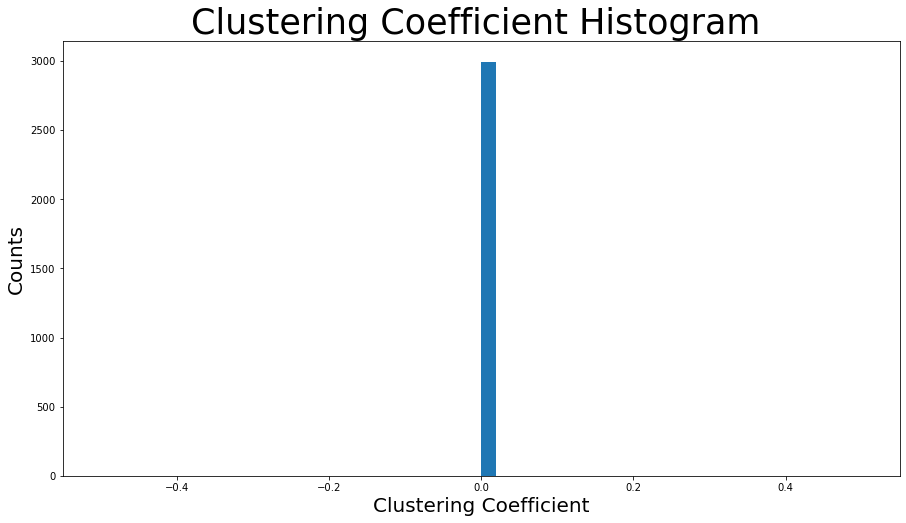

In [78]:
#the clustering coefficient distribution
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [79]:
triangles_per_node = list(nx.triangles(G).values())
sum(triangles_per_node) / 3  # divide by 3 because each triangle is counted once for each node

0.0

In [80]:
# the average number of triangles that a node is a part of: 106
np.mean(triangles_per_node)

0.0

In [81]:
#the median value is just 6 triangles
np.median(triangles_per_node)

0.0

## Bridges
An edge joining two nodes A and B in the graph is considered a bridge, if deleting the edge would cause A and B to lie in two different components.

In [82]:
#checked if there are any bridges in this network: True
nx.has_bridges(G)

True

In [83]:
#the edges that are bridges will be saved in a list and the number of them: 2973
bridges = list(nx.bridges(G))
len(bridges)

1877

In [84]:
#the edges that are local bridges: 18167
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

5791

Wall time: 242 ms


(-1.194789699912071,
 1.0499303859472273,
 -0.7417021164298058,
 0.8503871926665306)

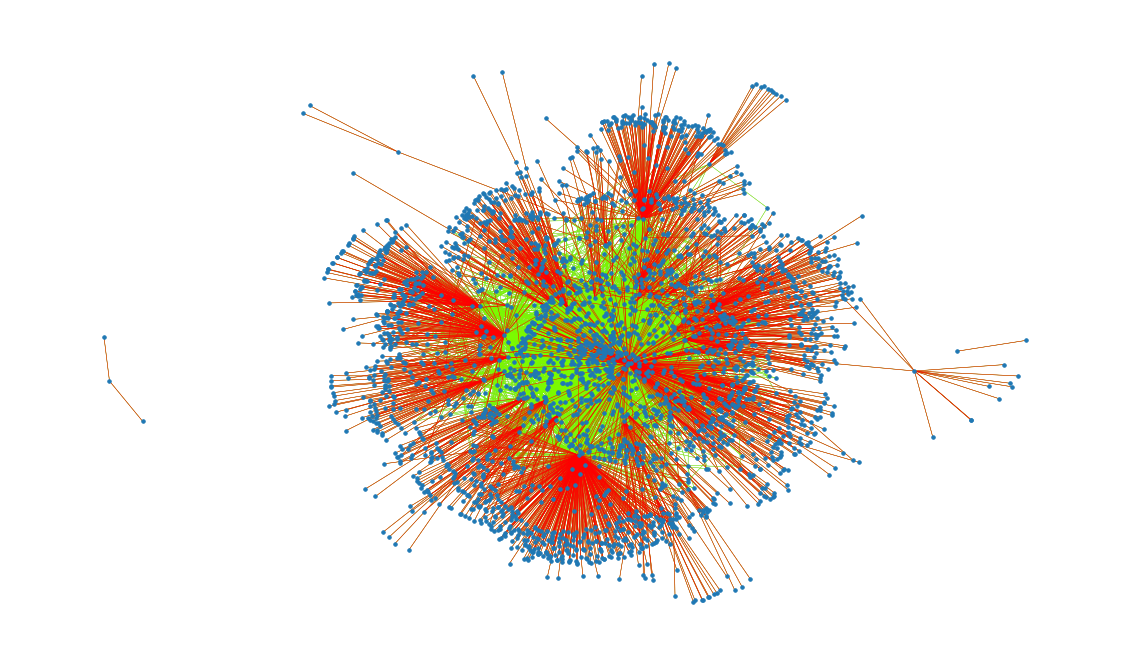

In [85]:
%%time
#Showcasing the bridges and local bridges in the network. 
#The bridges can be seen with the red color and the local bridges with the green color.
#Black edges are neither local bridges nor bridges.
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, pos=pos, node_size=12, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen"
)  # green color for local bridges
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=0.5, edge_color="r"
)  # red color for bridges
plt.axis("off")

## Assortativity
Assortativity describes the preference for a network’s nodes to attach to others that are similar in some way.  It takes values from -1 to 1. In detail, a positive assortativity coefficient indicates a correlation between nodes of similar degree, while a negative indicates correlation between nodes of different degrees.
In our case the assortativity coefficient is around -0.295, which is a negative number. That means that the network is correlated based nodes of different with their degrees.

In [86]:
nx.degree_assortativity_coefficient(G)

-0.29542429895169836

In [87]:
# use the potentially faster scipy.stats.pearsonr function.
nx.degree_pearson_correlation_coefficient(G)  

-0.2954242989516983

# REFERENCES:

U.S. Small Business Administration. (2023). Directory of federal government prime contractors with subcontracting plans. Retrieved from https://www.sba.gov/document/support-directory-federal-government-prime-contractors-subcontracting-plans

Population Estimate for 2022.  STATSAMERICA. Retrieved from https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1

U.S. General Services Administration. (2023). GSA selects Greenbelt, Maryland, for new FBI headquarters campus location. Retrieved from
https://www.gsa.gov/about-us/newsroom/news-releases/gsa-selects-greenbelt-maryland-for-new-fbi-headquarters-campus-location-11092023
   